<font size='5'>Ordinary Least Squares - T-values and Slopes</font>

This notebook demonstrates how sampling from the posterior does not preserve auto-correlation. 

In [26]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import statsmodels.api as sm

Create the subset of assets.

In [27]:
ohlc = pd.read_csv('./data/TLT_sample.csv')

closes = np.log(ohlc['marketClose']).diff().apply(abs)

Formatting the training data. 1st-order differencing of the log price for each asset. View auto-correlation.

-1.6196942705243262e-06


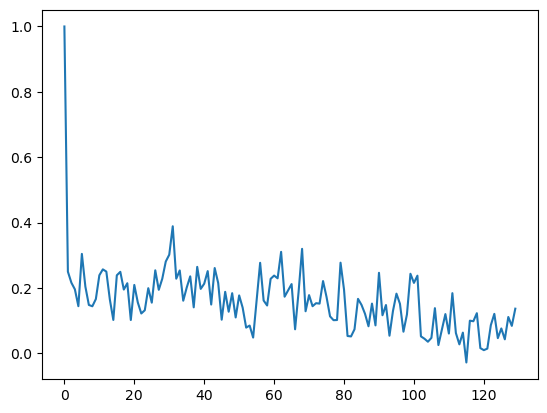

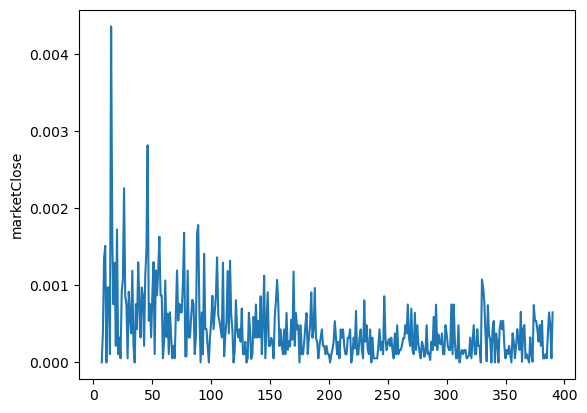

6
6
-5.4241890585782215e-05


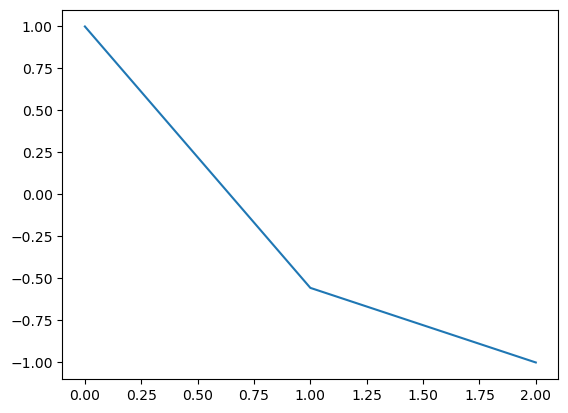

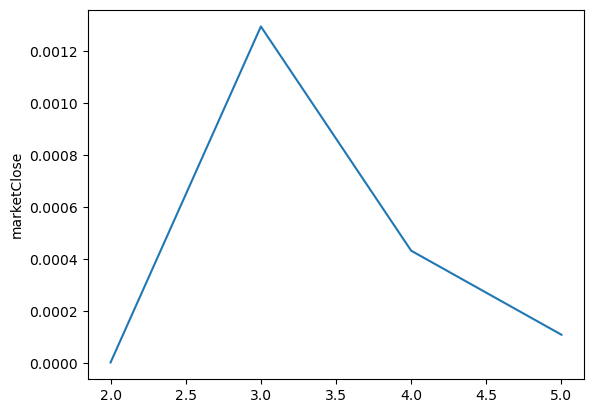

1
1
-1.6189360387994682e-06


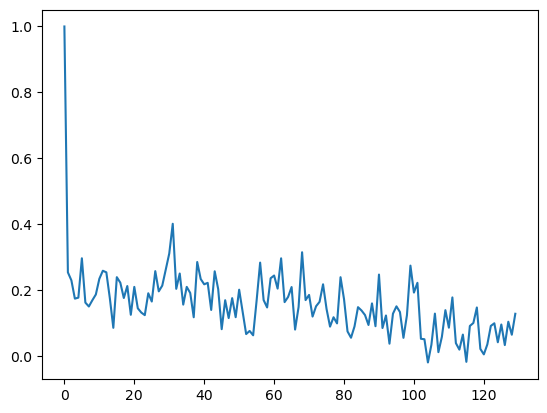

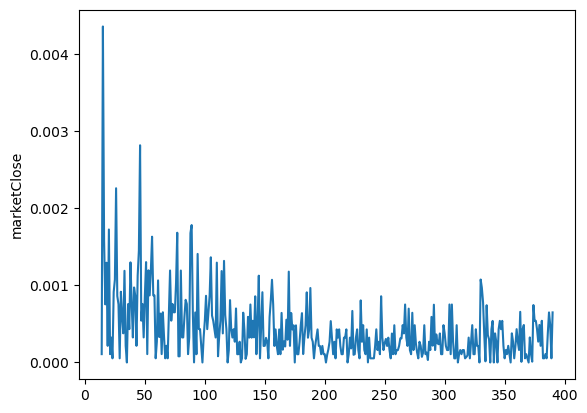

6
6


ValueError: zero-size array to reduction operation maximum which has no identity

In [30]:

decay_func = lambda S, _range: [S.autocorr(lag=N) for N in _range]

def get_tValLinR(closes):
    ''' Fit an ordinary least squares regression to close price series 
        Returns: 
            t-values 
            params 
    '''
    x=np.ones((closes.shape[0],2))
    x[:,1]=np.arange(closes.shape[0])
    
    ols=sm.OLS(closes, x).fit()
    return  ols.tvalues[1], \
            ols.params[1]


def get_linear_regression_slopes_recursively(df):
    # Check if the dataframe is empty
    if df.empty or len(df) <= 1: 
        return

    # Find the largest value in the data
    max_value = df.idxmin()

    # Split the data into two sets: one before and one after the largest value
    df_before = df[:max_value-1]
    df_after = df[max_value:]

    # Get the linear regression slope for each set using statsmodels OLS
    _, model_after = get_tValLinR(df_after)

    # Print the slope of the regression line for each set
    print(model_after)
    
    sns.lineplot(data=decay_func(df_after, range(0,130)))
    plt.show()
    
    sns.lineplot(data=df_after)
    plt.show()

    # Recursively get the slopes for each set
    print(len(df_before))
    print(len(df_before))
    if len(df_after) > 1 and len(df_before) > 1:
        get_linear_regression_slopes_recursively(df_before)
        get_linear_regression_slopes_recursively(df_after)

get_linear_regression_slopes_recursively(closes)